<h1>Regularization for Linear Regression</h1>

<p>Notebook for Ridge, Lasso, ElasticNet Regressions in comparison with sklearn's</p>

In [1]:
from abc import ABC, abstractmethod

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

from IPython.display import HTML
%matplotlib inline

In [2]:
class BaseRegression(ABC):
    def init_weights(self, input_shape):
        self.w = np.random.normal(0, 1, size=(input_shape, 1))
        self.b = np.random.normal(0, 1, size=(1, 1))
    
    @staticmethod
    def mse(y_true, y_pred):
        return np.mean((y_true - y_pred)**2)
    
    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -2 * (y_true - y_pred) / y_true.shape[0]
    
    @abstractmethod
    def w_grad(self, x, y):
        pass
    
    def b_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        ones = np.ones((len(y), 1))
        grad = ones.T.dot(mse_deriv)
        return grad
    
    def fit(self, x, y, lr=0.01, n_iter=1000):
        self.init_weights(x.shape[1])
        for _ in range(n_iter):
            w_grad = self.w_grad(x, y)
            b_grad = self.b_grad(x, y)
            self.w -= lr * w_grad
            self.b -= lr * b_grad
            
        return self
    
    def predict(self, x):
        return x.dot(self.w) + self.b

In [3]:
class LinearRegression(BaseRegression):  
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv)
        return grad


class RidgeRegression(BaseRegression):
    def __init__(self, alpha=0):
        self.alpha = alpha
    
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv) + (2 * self.alpha * self.w) / y.shape[0]
        return grad


class LassoRegression(BaseRegression):
    def __init__(self, alpha=0):
        self.alpha = alpha

    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -(y_true - y_pred) / y_true.shape[0]
    
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv) + self.alpha * np.sign(self.w)
        return grad


class ElasticNetRegression(BaseRegression):
    def __init__(self, alpha=0, l1_ratio=0):
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    @staticmethod
    def mse_derivative(y_true, y_pred):
        return -(y_true - y_pred) / y_true.shape[0]
    
    def w_grad(self, x, y):
        preds = self.predict(x)
        mse_deriv = self.mse_derivative(y, preds)
        grad = x.T.dot(mse_deriv) + (self.alpha * (1 - self.l1_ratio) * self.w)\
             + self.alpha * self.l1_ratio * np.sign(self.w)
        return grad

In [4]:
x, y = make_regression(n_samples=100, n_features=50, bias=1, noise=10, n_informative=25)

scaler = StandardScaler()
x = scaler.fit_transform(x)

y = y.reshape(-1, 1)
x.shape, y.shape

((100, 50), (100, 1))

In [5]:
reg = LinearRegression()
reg.fit(x, y, n_iter=10000)

In [6]:
x_ols = np.hstack((np.ones((len(x), 1)), x))
w = np.linalg.inv(x_ols.T.dot(x_ols)).dot(x_ols.T).dot(y)
np.allclose(reg.w, w[1:])

True

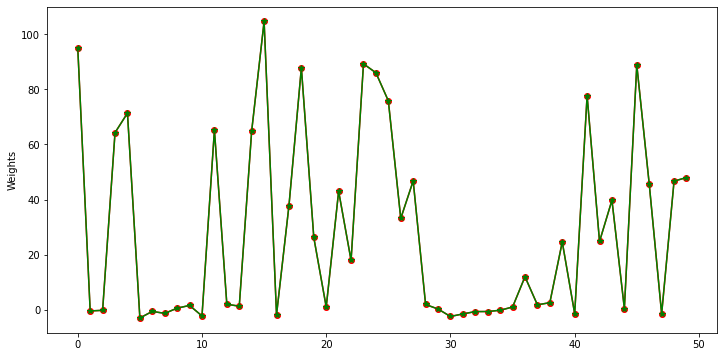

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(reg.w)), reg.w.ravel(), 'ro-')
plt.plot(range(len(reg.w)), w[1:].ravel(), 'g*-')
plt.ylabel('Weights');

In [8]:
reg_ridge = RidgeRegression(10)
reg_ridge.fit(x, y, n_iter=10000)
print(reg_ridge.b)
print(reg_ridge.w.T)

[[1.44306492]]
[[ 84.52766839  -4.71984842  -5.83317939  61.35348275  58.59854923
   -0.67335869   1.48956424  -4.77245788   2.69499366  -4.63762601
    2.09129115  50.95954542   5.11625358   2.40597327  56.04089433
   85.69121694   3.05792883  36.11113918  72.93993957  20.74053415
    6.61563932  42.16441631  11.30595652  80.89473778  74.05162933
   61.48666914  26.31167773  38.85141497   1.42426808  -6.96870146
    1.73490872   2.71182289   8.20533469   7.61727841  -0.47617758
   -0.39966472   7.28690681  -5.68085417   6.7624704   24.70797411
    0.62786723  65.34561582  25.08194823  31.80001048  -2.21187927
   68.52875517  43.72441719 -11.17486684  36.62327663  41.35579688]]


In [9]:
ridge = Ridge(10)
ridge.fit(x, y)
print(ridge.intercept_)
print(ridge.coef_)

[1.44306492]
[[ 84.52766839  -4.71984842  -5.83317939  61.35348275  58.59854923
   -0.67335869   1.48956424  -4.77245788   2.69499366  -4.63762601
    2.09129115  50.95954542   5.11625358   2.40597327  56.04089433
   85.69121694   3.05792883  36.11113918  72.93993957  20.74053415
    6.61563932  42.16441631  11.30595652  80.89473778  74.05162933
   61.48666914  26.31167773  38.85141497   1.42426808  -6.96870146
    1.73490872   2.71182289   8.20533469   7.61727841  -0.47617758
   -0.39966472   7.28690681  -5.68085417   6.7624704   24.70797411
    0.62786723  65.34561582  25.08194823  31.80001048  -2.21187927
   68.52875517  43.72441719 -11.17486684  36.62327663  41.35579688]]


In [10]:
np.allclose(ridge.coef_, reg_ridge.w.T)

True

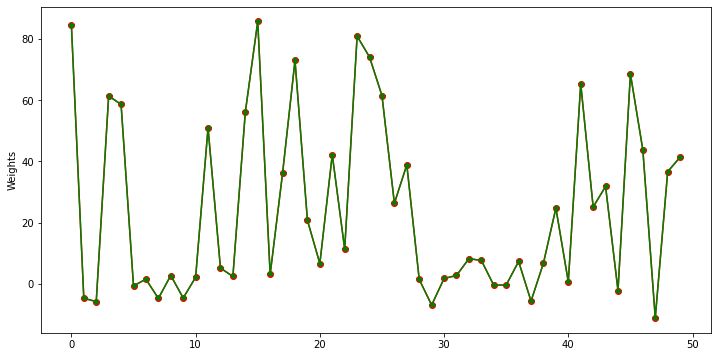

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(ridge.coef_.ravel())), reg_ridge.w.ravel(), 'ro-')
plt.plot(range(len(ridge.coef_.ravel())), ridge.coef_.ravel(), 'g*-')
plt.ylabel('Weights');

In [12]:
reg_lasso = LassoRegression(alpha=3)
reg_lasso.fit(x, y, n_iter=10000)
print(reg_lasso.b)
print(reg_lasso.w.T)

[[1.44306492]]
[[ 8.91078504e+01 -2.68922702e-02 -1.54919151e-04  6.02337571e+01
   6.64047382e+01 -2.57863893e-02  7.69837893e-03 -1.66375282e-02
   2.88650444e-02 -2.75292688e-02 -2.94475892e-03  5.89880816e+01
   3.46126755e-03  2.32700644e-02  6.25205727e+01  9.92087370e+01
   3.32016495e-02  3.68463615e+01  8.30570421e+01  2.12091324e+01
   1.77807055e-03  4.13759702e+01  1.24894359e+01  8.89096058e+01
   8.19174887e+01  7.30506280e+01  2.89539794e+01  4.52036487e+01
   2.24885970e-04 -3.14257056e-02  1.31121212e-02 -2.13829801e-02
  -1.18330733e-04  5.97920530e-01  3.67013092e-02 -1.97329770e-02
   6.36260036e+00  3.25939543e-03  7.89611433e-01  2.15240956e+01
  -2.74151687e-02  7.47098594e+01  2.36835555e+01  3.40876738e+01
  -4.34419584e-02  8.22427611e+01  4.33717504e+01 -3.00648670e-01
   4.07137833e+01  4.51193649e+01]]


In [13]:
lasso = Lasso(alpha=3)
lasso.fit(x, y)
print(lasso.intercept_)
print(lasso.coef_)

[1.44306492]
[89.10515539 -0.         -0.         60.22822202 66.41783016  0.
  0.         -0.          0.         -0.          0.         58.99461375
  0.          0.         62.53547537 99.22523502  0.         36.84758467
 83.06791144 21.21418705  0.         41.37914328 12.48743778 88.91179349
 81.92353685 73.07589622 28.9622579  45.21731807  0.         -0.
  0.          0.          0.          0.59282141  0.         -0.
  6.36710981 -0.          0.78647339 21.52355098 -0.         74.71748151
 23.68488028 34.08942849 -0.         82.25999765 43.36857363 -0.28689481
 40.72392177 45.13054722]


In [14]:
np.allclose(lasso.coef_, reg_lasso.w.T)

False

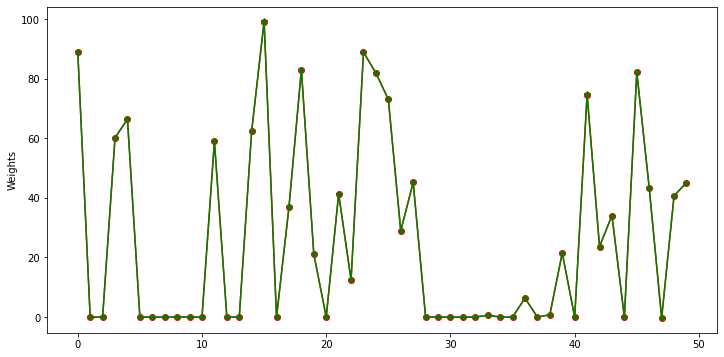

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(lasso.coef_)), reg_lasso.w.ravel(), 'ro-')
plt.plot(range(len(lasso.coef_)), lasso.coef_.ravel(), 'g*-')
plt.ylabel('Weights');

In [16]:
reg_elastic = ElasticNetRegression(alpha=10, l1_ratio=0.8)
reg_elastic.fit(x, y, n_iter=10000)
print(reg_elastic.b)
print(reg_elastic.w.T)

[[1.44306492]]
[[ 3.04570648e+01 -8.09261091e+00 -7.91851431e+00  2.22860738e+01
   1.60325869e+01  3.95689198e+00  1.09066250e+00 -3.24132072e+00
   1.61726331e+00 -6.27869023e+00  6.05881098e+00  4.19164564e+00
   4.39954679e+00  1.92687195e+00  2.35959306e+01  2.21271406e+01
   6.79619350e+00  1.73960926e+01  2.08824217e+01  4.99972946e+00
   2.07696685e-01  1.63318515e+01 -6.73021615e-01  3.06279680e+01
   2.42242645e+01  1.45553675e+01  7.19699662e+00  1.57994618e+01
  -7.79380023e+00 -5.45537521e+00  3.41189860e+00  5.94041909e-01
   1.21991430e+01  1.37187735e+01 -7.43076059e-02  3.32646376e-03
  -2.53750195e-02 -8.92113436e+00  6.80886664e+00  5.69469521e+00
   7.35534510e-01  1.92983075e+01  1.61627181e+01  5.29834312e+00
  -1.06082433e+01  1.30460677e+01  2.00037918e+01 -8.74035016e+00
   9.65393734e+00  1.89020595e+01]]


In [17]:
elastic = ElasticNet(alpha=10, l1_ratio=0.8)
elastic.fit(x, y)
print(elastic.intercept_)
print(elastic.coef_)

[1.44306492]
[ 3.04569507e+01 -8.09315718e+00 -7.91908159e+00  2.22853516e+01
  1.60317501e+01  3.95413722e+00  1.09008355e+00 -3.24085952e+00
  1.61704323e+00 -6.27969723e+00  6.05848542e+00  4.19084137e+00
  4.39843548e+00  1.92658463e+00  2.35973986e+01  2.21274556e+01
  6.79476647e+00  1.73969166e+01  2.08841617e+01  5.00105828e+00
  2.08882782e-01  1.63315171e+01 -6.72251058e-01  3.06273379e+01
  2.42253516e+01  1.45551091e+01  7.20018587e+00  1.57979407e+01
 -7.79434351e+00 -5.45556173e+00  3.41157458e+00  5.93842376e-01
  1.21995390e+01  1.37167228e+01 -0.00000000e+00 -0.00000000e+00
 -2.49326812e-02 -8.92077129e+00  6.80946854e+00  5.69265399e+00
  7.36131176e-01  1.92976030e+01  1.61624226e+01  5.29712196e+00
 -1.06082120e+01  1.30477396e+01  2.00053152e+01 -8.74293371e+00
  9.65136489e+00  1.89014881e+01]


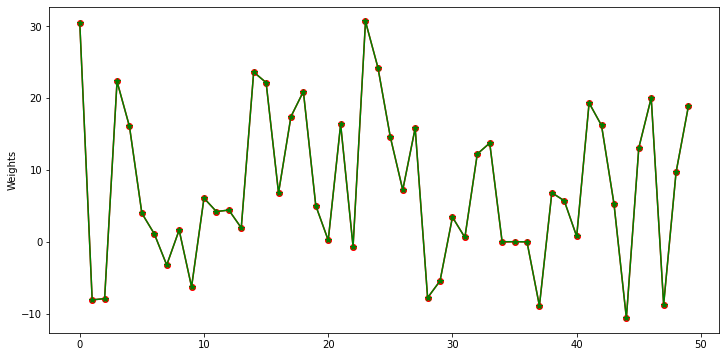

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(elastic.coef_)), reg_elastic.w.ravel(), 'ro-')
plt.plot(range(len(elastic.coef_)), elastic.coef_.ravel(), 'g*-')
plt.ylabel('Weights');

In [19]:
np.allclose(elastic.coef_, reg_elastic.w.T)  # certain accuracy

False

In [20]:
with open('./style.css') as f:
    style = f.read()
HTML(style)